**Data analysis**

После 24 февраля в России заблокировали практически все независимые издания, три крупнейшие соцсети и периодически взникают слухи и блокировки ютуба. Есть идея сделать короткий материал и показать на цифрах насколько 2022 год отличается (отличается ли?) от блокировок в прошлые годы.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style='whitegrid')
sns.set(rc={"figure.figsize":(12, 7)})

In [6]:
data = pd.read_csv('scraped_blocking_data.csv', index_col=0)
data.date = pd.to_datetime(data.date)

# пример данных от Роскомсвободы
data.head()

,date,site,who_blocked,count_of_blocked_domains,year,month
0,2022-07-15,piratebayproxy.autos,Минкомсвязь,0,2022,7
1,2022-07-15,plan-a.guru,Генпрокуратура,0,2022,7
2,2022-07-15,nu15.kinovod.cam,Минкомсвязь,0,2022,7
3,2022-07-15,mega-pesni.one,Минкомсвязь,0,2022,7
4,2022-07-15,thepiratebay.gg,Минкомсвязь,0,2022,7


Заблокированных сайтов за 7 месяцев в 2022 году уже больше, чем за весь 2020 год. И постепенно эта цифра приближается к рекордному по блокировкам 2021 году. 

In [9]:
data.groupby('year', as_index=False).size()

,year,size
0,2012,1
1,2013,24
2,2014,1511
3,2015,2970
4,2016,12092
5,2017,19612
6,2018,51728
7,2019,83770
8,2020,123554
9,2021,159248


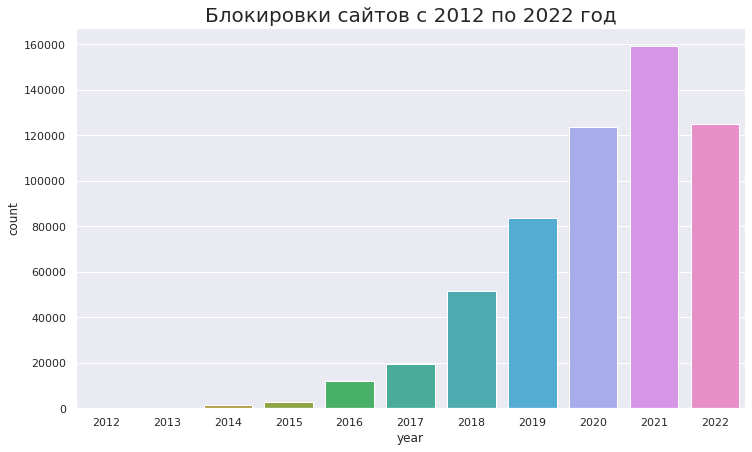

In [13]:
sns.countplot(
    data=data,
    x='year',
).set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20);

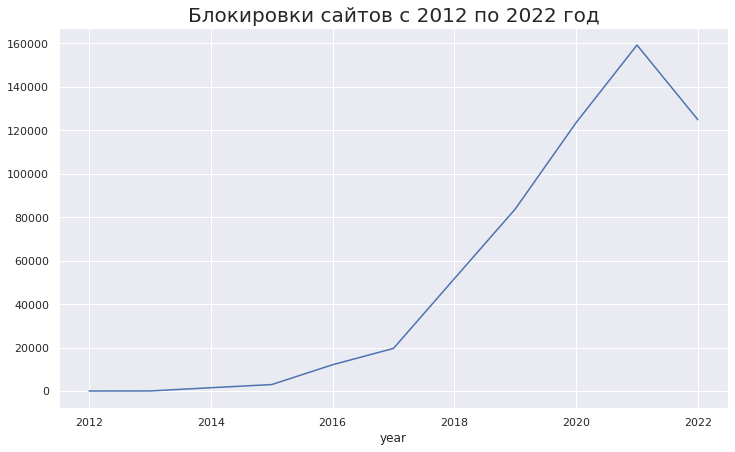

In [16]:
# same but lineplot
sns.lineplot(
    data=data.groupby('year').size(),
).set_title('Блокировки сайтов c 2012 по 2022 год', fontsize=20);

Насколько весна 2022 года нетипичная видно в блокировках по месяцам за все годы. За обычно блокировали не более 10 тысяч сайтов. В 2022 году цифра заблокированных сайтов не опускалась ниже 15 тысяч. А в марте и вовсе был месячный максимум за всё время ~27000 заблокированных сайтов.

In [17]:
temp = data[(data.year >= 2018)].groupby(['year', 'month']).size().reset_index().sort_values(by=['year', 'month'], ascending=True) #  & (data.month <= 6)
temp.columns = ['year', 'month', 'count'] 

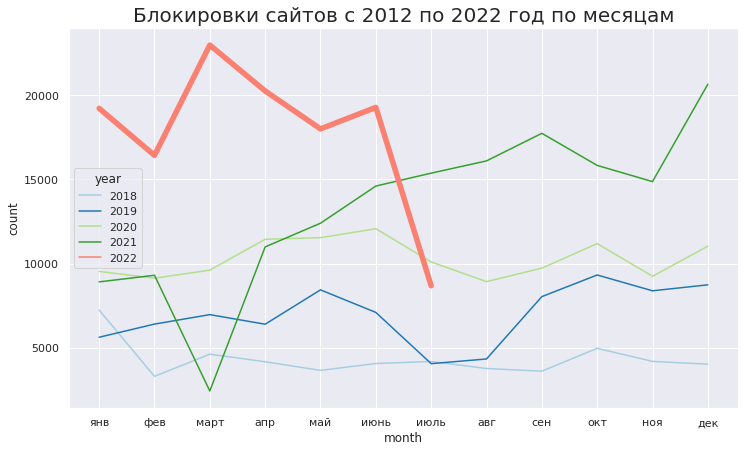

In [23]:
sns.lineplot(
    data=temp[temp.year!=2022],
    x='month',
    y='count',
    hue='year',
    palette="Paired",
)

sns.lineplot(
    data=temp[temp.year==2022],
    x='month',
    y='count',
    linewidth=5.5,
    hue='year',
    palette="dark:salmon_r",
).set_title('Блокировки сайтов c 2012 по 2022 год по месяцам', fontsize=20);

plt.xticks(range(1, 13), ['янв', 'фев', 'март', 'апр', 'май', 'июнь', "июль", 'авг', "сен", "окт" , "ноя", "дек"])
plt.show()

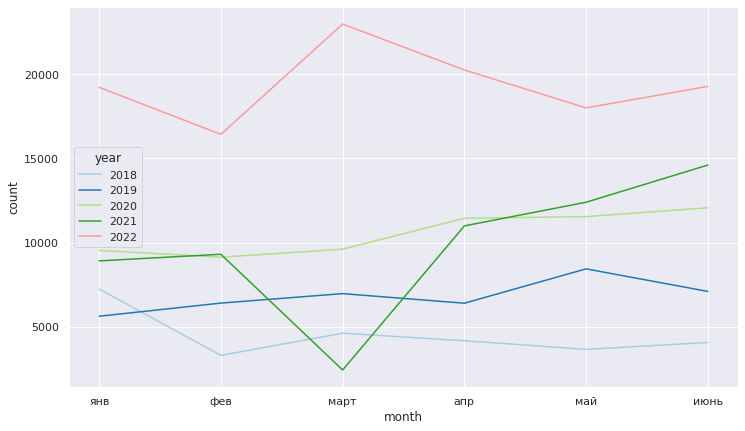

In [26]:
# Тот же график, но с отрезком за 6 месяцев
sns.lineplot(
    data=temp[(temp.month <= 6)],
    x='month',
    y='count',
    hue='year',
    palette="Paired"
)

plt.xticks(range(1, 7), ['янв', 'фев', 'март', 'апр', 'май', 'июнь'])
plt.show()

В реестре также указано, кто инициировал блокировку того или иного сайта. Можно посчитать по чьей инициативе заблокировали больше всего сайтов. Но тут 2022 год выглядит примерно также как и прошлые годы. 

In [32]:
# кол-во блокировок по ведомствам за 2022 год
data[data.year == 2022].groupby('who_blocked', as_index=False).size().sort_values(by='size', ascending=False).head(10)

,who_blocked,size
1499,ФНС,39735
869,Мосгорсуд,13667
247,Генпрокуратура,12362
845,Минкомсвязь,6012
1208,Роскомнадзор,5523
792,МВД,4913
1207,Росздравнадзор,3591
396,Зареченский районный суд г.Тулы - Тульская обл...,3256
1193,РАР,1609
667,Куйбышевский районный суд г. Омска - Омская об...,520


In [34]:
# кол-во блокировок по ведомствам с 2012 по 2021 годы
data[data.year != 2022].groupby('who_blocked', as_index=False).size().sort_values(by='size', ascending=False).head(10)

,who_blocked,size
1895,ФНС,220426
326,Генпрокуратура,42558
1048,Минкомсвязь,32000
2113,суд,25519
1076,Мосгорсуд,23262
1517,Роскомнадзор,18679
993,МВД,14471
1516,Росздравнадзор,4917
1495,РАР,2093
1748,Таганский районный суд - Москва,1070


In [53]:
# doubles_data = data[data.year == 2022].groupby('site').size().sort_values(ascending=False).reset_index()
# doubles_data.columns.values[1] = 'count_of_blocks'

# doubles_data[doubles_data.site.str.contains('mediazona')]

**Вопросы к экспертам РКН:**
- Чем блокировки в 2022 году отличаются от блокировок в прошлом?
- В реестре десятки тысяч разных сайтов. Если на считать политические сайты и медиа, то что это сайты?
    - Какой примерно процент в реестре это независимые медиа, сайты с критикой Путина и т.д.?
    - Многие издания создают множество зеркал. Можно ли подсчитать сколько их уже в реестре? Можно ли ими объяснить скачок блокировок в этом году?
- Чем отличаются блокировки РКН, судов, ФНС, генпрокуратуры и т.д?
- Скачок был и в прошлом году примерно в это же время? Что тогда произошло? Какая-то странная сезонность в блокировках.
    - Это блокировки связанные с протестами за Навального?

**Материалы Роскомсвободы о блокировках:**

- [Военной цензуре подверглось более 3000 сайтов](https://roskomsvoboda.org/post/voennaya-cenzura-3000-saytov/)
- [Военной цензурой накрыло более 5000 сайтов](https://roskomsvoboda.org/post/voen-cenzura-5300-saytov/)
- [Военной цензуре подверглось более 1500 сайтов](https://roskomsvoboda.org/post/ban-1500-ssylok/)
